<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana6/Simulaci%C3%B3n_MC_Page_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Bibliotecas

In [4]:
import itertools
import pprint	
import random

import numpy as np
import pandas as pd	

import networkx as nx    # https://networkx.org/documentation/stable/index.html
from matplotlib import pyplot as plt


# Funciones

#### añadir_conexiones()

In [1]:
def añadir_conexiones(g, pr): 
    for nodo in g.nodes(): 
        for nodo1 in g.nodes(): 
            if (nodo != nodo1): 
                ra = random.random() 
                if (ra < pr): 
                    g.add_edge(nodo, nodo1) 
                else: 
                    continue
    return g 

#### PageRank_caminata_aleatoria()

In [2]:
def PageRank_caminata_aleatoria(g, n_iter):

  #inicialiaemos en 0 los cuenta para cada nodo
  nodos = list(g.nodes()) 
  cuenta = np.zeros_like(nodos)
  
  #escojemos un nodo aleatoriamente, probabilidad uniforme
  n = random.choice(nodos)
  cuenta[n] += 1

  #lista de vecinos a donde ir, probabilidad uniforme
  vecinos = list(g.out_edges(n)) 

  #iterar n_iter veces
  z = 1
  while (z != n_iter): 
      #Si no hay vecinos escogemos cualquier vecino al azar
      if (len(vecinos) == 0):        
        siguiente = random.choice(nodos) 
      else:
        n1 = random.choice(vecinos) 
        siguiente = n1[1] 
      cuenta[siguiente] += 1
      vecinos = list(g.out_edges(siguiente)) 
      z += 1

  #Obtenemos los pesos de cada nodo
  pesos = np.array(cuenta)/n_iter   #vector r

  #Guardamos los resultados en una tabla ordenada por pesos
  rank = pd.DataFrame({'Nodo':nodos,
                       'Pesos':pesos}).sort_values('Pesos',
                                                   ascending=False)
  rank.index = range(1,g.number_of_nodes()+1)
  
  return pesos, rank

# PageRank con conjunto de datos sintéticos

Crear un grafo dirigido con N vértices y aristas

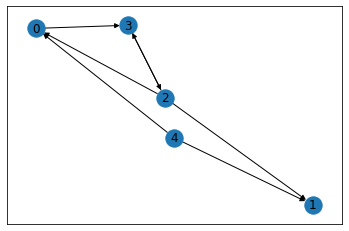

In [5]:
#Crear grafica usando la biblioteca networkx
g = nx.DiGraph() 

#Añadir vertices
N = 5
g.add_nodes_from(range(N)) 

# Agregar aristas
g = añadir_conexiones(g, 0.4) 

#Ver la gráfica
nx.draw_networkx(g, with_labels=True)	

In [6]:
print('Nodos:', g.nodes())
print('\nNúmero de Nodos:', g.number_of_nodes())
print('\nTotal de Vertices:',g.number_of_edges())


Nodos: [0, 1, 2, 3, 4]

Número de Nodos: 5

Total de Vertices: 7


In [7]:
g.out_edges

OutEdgeView([(0, 3), (2, 0), (2, 1), (2, 3), (3, 2), (4, 0), (4, 1)])

In [8]:
g.out_edges(1)

OutEdgeDataView([])

Page Rank, utilizando caminata aleatoria

In [9]:
vec_r, pagerank, = PageRank_caminata_aleatoria(g, n_iter = 2) 

vec_r

array([0. , 0. , 0.5, 0.5, 0. ])

In [10]:
vec_r, pagerank, = PageRank_caminata_aleatoria(g, n_iter = 1000) 

vec_r

array([0.148, 0.181, 0.332, 0.301, 0.038])

In [11]:
vec_r, pagerank, = PageRank_caminata_aleatoria(g, n_iter = 100000) 

vec_r

array([0.16181, 0.15946, 0.33893, 0.30693, 0.03287])

In [12]:
pagerank

,Nodo,Pesos
1,2,0.33893
2,3,0.30693
3,0,0.16181
4,1,0.15946
5,4,0.03287


Utilizando funcion pagerank de la biblioteca networkx

In [13]:
pesos_dict = nx.pagerank(g) 
p_ordenado = sorted(pesos_dict.items(), key=lambda x: x[1], reverse=True) 
  
print("PageRank using inbuilt pagerank method") 
for i in p_ordenado:  
    print(i[0], end=", ") 

PageRank using inbuilt pagerank method
2, 3, 0, 1, 4, 

## PageRank de las páginas de la Universidad de Stanford (2002)

* grafico https://snap.stanford.edu/data/web-Stanford.html
* matriz https://www.cise.ufl.edu/research/sparse/matrices/SNAP/web-Stanford.html



In [15]:
from scipy.io import mmread

M = mmread("/content/drive/MyDrive/Datos/Web-Stanford/web-Stanford/web-Stanford.mtx")
M.shape

(281903, 281903)

In [16]:
G = nx.from_scipy_sparse_matrix(M, parallel_edges=True, create_using=nx.DiGraph)

In [17]:
%time 
vec_r, pagerank, = PageRank_caminata_aleatoria(G, n_iter = 10000000) 
pagerank

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


,Nodo,Pesos
1,163187,0.004087
2,241503,0.004059
3,150087,0.004017
4,200107,0.004011
5,221536,0.003999
...,...,...
281899,94023,0.000000
281900,94024,0.000000
281901,94025,0.000000
281902,94026,0.000000


## **Aplicaciones**

**Redes electricas**: 

* Chung F, Zhao W. PageRank and Random Walks on Graphs. En: Katona GOH, Schrijver A, Szőnyi T, Sági G, editores. Fete of Combinatorics and Computer Science [Internet]. Berlin, Heidelberg: Springer Berlin Heidelberg; 2010 [citado 28 de diciembre de 2020]. p. 43-62. (Tóth GF, Katona GOH, Lovász L, Pálfy PP, Recski A, Stipsicz A, et al. Bolyai Society Mathematical Studies; vol. 20). Disponible en: http://link.springer.com/10.1007/978-3-642-13580-4_3

**Redes sociales (epidemiología, difusión de noticias, moda, etc)**
* Mao C, Xiao W. A Comprehensive Algorithm for Evaluating Node Influences in Social Networks Based on Preference Analysis and Random Walk [Internet]. Vol. 2018, Complexity. Hindawi; 2018 [citado 28 de diciembre de 2020]. p. e1528341. Disponible en: https://www.hindawi.com/journals/complexity/2018/1528341/

**Detección de fraude**

* How to Perform Fraud Detection with Personalized Page Rank [Internet]. [citado 28 de diciembre de 2020]. Disponible en: https://www.sicara.ai/blog/2019-01-09-fraud-detection-personalized-page-rank








## **Conjuntos de Datos**

1. Stanford Large Network Dataset Collection [Internet]. [citado 28 de diciembre de 2020]. Disponible en: https://snap.stanford.edu/data/#email
